In [1]:
# pip install --upgrade palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels scikit-learn pyjanitor session-info
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as s
import statsmodels.formula.api as smf
import statsmodels.stats as ss


/home/ojitos369/anaconda3/envs/pyd/lib/python3.12/site-packages/palmerpenguins/penguins.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [3]:
pnr = palmerpenguins.load_penguins_raw()
pn = palmerpenguins.load_penguins()

In [4]:
pn.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [5]:
pn.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

In [6]:
pn.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

In [8]:
rango = pn.max(numeric_only=True) - pn.min(numeric_only=True)
rango

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

In [17]:
standar = pn.std(numeric_only=True)
standar

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
year                   0.818356
dtype: float64

In [52]:
media = pn.mean(numeric_only=True)
media

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

In [53]:
media + standar

bill_length_mm         49.381514
bill_depth_mm          19.125963
flipper_length_mm     214.976918
body_mass_g          5003.708922
year                 2008.847426
dtype: float64

In [20]:
media - standar

bill_length_mm         38.990416
bill_depth_mm          15.325207
flipper_length_mm     182.938286
body_mass_g          3248.045464
year                 2007.181644
dtype: float64

In [29]:
iq5 = pn.quantile(0.5, numeric_only=True)
iq5

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
Name: 0.5, dtype: float64

In [30]:
iq75 = pn.quantile(0.75, numeric_only=True)
iq75

bill_length_mm         48.5
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4750.0
year                 2009.0
Name: 0.75, dtype: float64

In [31]:
iq25 = pn.quantile(0.25, numeric_only=True)
iq25

bill_length_mm         39.225
bill_depth_mm          15.600
flipper_length_mm     190.000
body_mass_g          3550.000
year                 2007.000
Name: 0.25, dtype: float64

In [32]:
iq = iq75 - iq25
iq

bill_length_mm          9.275
bill_depth_mm           3.100
flipper_length_mm      23.000
body_mass_g          1200.000
year                    2.000
dtype: float64

In [37]:
(
    pn.quantile(q=[0.25, 0.5, 0.75], numeric_only=True)
    .T
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - 0.25
    )
)

,variable,0.25,0.5,0.75,iqr
0,bill_length_mm,39.225,44.45,48.5,48.25
1,bill_depth_mm,15.600,17.30,18.7,18.45
2,flipper_length_mm,190.000,197.00,213.0,212.75
3,body_mass_g,3550.000,4050.00,4750.0,4749.75
4,year,2007.000,2008.00,2009.0,2008.75


In [63]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """ Find optima bondwidth using Freedman-Diaconis rule """
    IQR = x.quantile(0.75) - x.quantile(0.24)
    N = x.size
    return 2 * IQR / N ** (1 / 3)

obw = freedman_diaconis_bindwidth(pn.flipper_length_mm)
obw

np.float64(6.565054727883573)

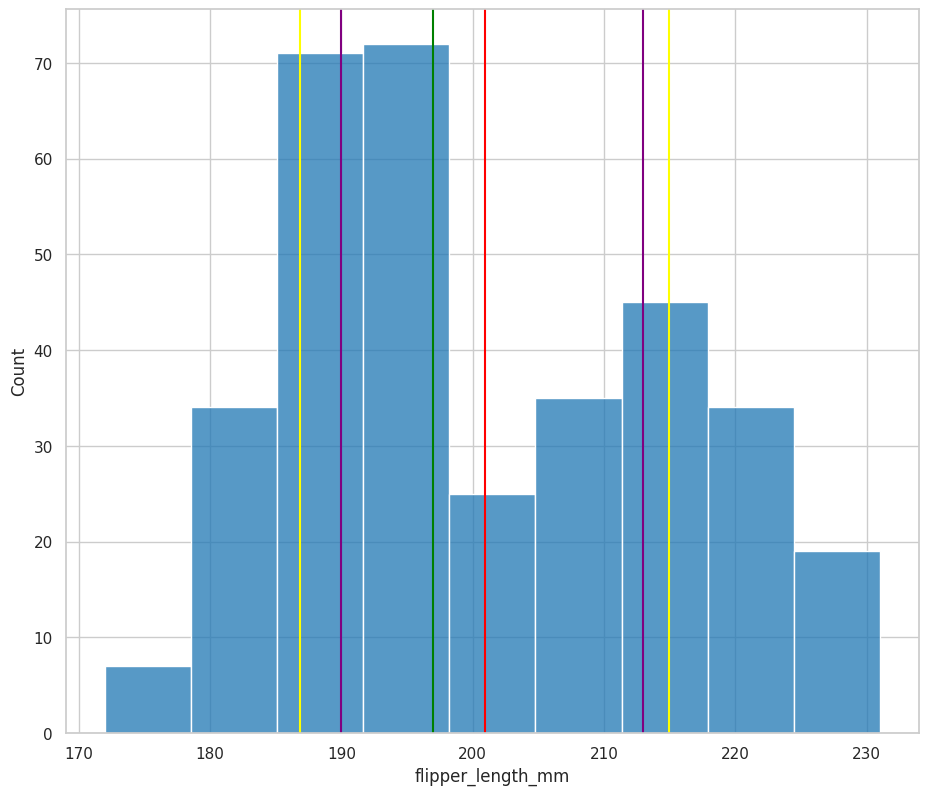

In [64]:
sns.histplot(
    data = pn,
    x = "flipper_length_mm",
    binwidth=obw
)
plt.axvline(
    x = pn.flipper_length_mm.mean(),
    color = "red",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.median(),
    color = "green",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.quantile(0.75),
    color = "purple",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.quantile(0.25),
    color = "purple",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.mean() + pn.flipper_length_mm.std(),
    color = "yellow",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.mean() - pn.flipper_length_mm.std(),
    color = "yellow",
    linestyle= "solid"
)

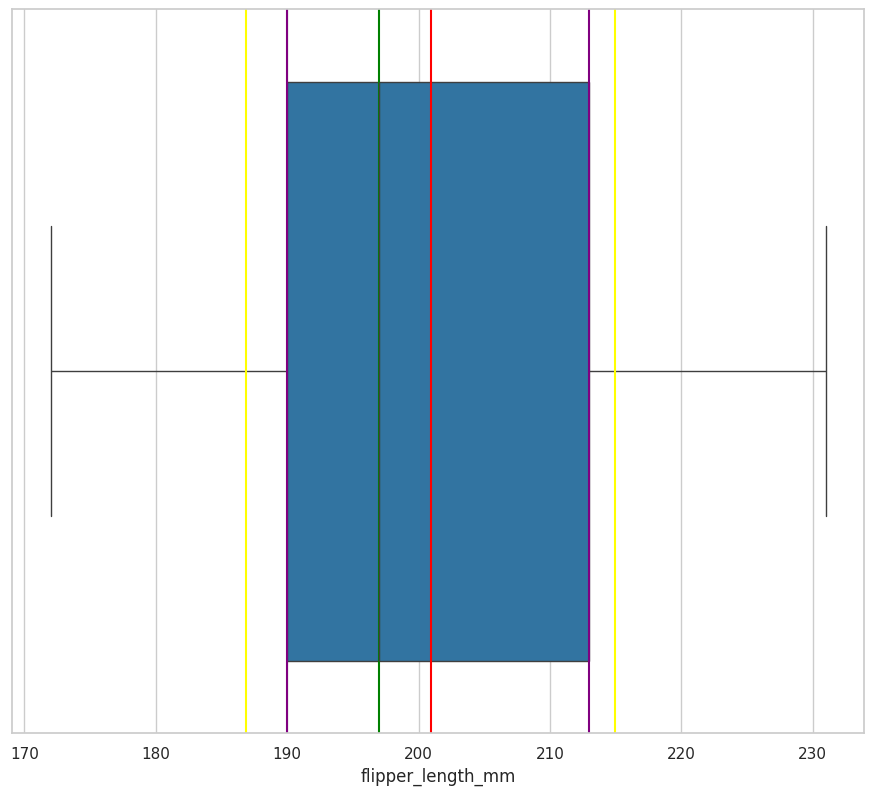

In [66]:
sns.boxplot(
    data = pn,
    x = "flipper_length_mm"
)
plt.axvline(
    x = pn.flipper_length_mm.mean(),
    color = "red",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.median(),
    color = "green",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.quantile(0.75),
    color = "purple",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.quantile(0.25),
    color = "purple",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.mean() + pn.flipper_length_mm.std(),
    color = "yellow",
    linestyle= "solid"
)
plt.axvline(
    x = pn.flipper_length_mm.mean() - pn.flipper_length_mm.std(),
    color = "yellow",
    linestyle= "solid"
)